In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and datetime module from the datetime library
import time
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Start an empty list to hold weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitdue and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [9]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
#     Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count}|{city}')
#     Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1|ushuaia
Processing Record 2 of Set 1|dikson
Processing Record 3 of Set 1|iqaluit
Processing Record 4 of Set 1|busselton
Processing Record 5 of Set 1|luanda
Processing Record 6 of Set 1|leningradskiy
Processing Record 7 of Set 1|lebu
Processing Record 8 of Set 1|albany
Processing Record 9 of Set 1|katsuura
Processing Record 10 of Set 1|madawaska
Processing Record 11 of Set 1|hambantota
Processing Record 12 of Set 1|hobart
Processing Record 13 of Set 1|puerto ayora
Processing Record 14 of Set 1|anqing
Processing Record 15 of Set 1|tura
Processing Record 16 of Set 1|maceio
Processing Record 17 of Set 1|bereda
Processing Record 18 of Set 1|port alfred
Processing Record 19 of Set 1|gao
Processing Record 20 of Set 1|grindavik
Processing Record 21 of Set 1|hermanus
Processing Record 22 of Set 1|kosh-agach
Processing Record 23 of Set 1|camocim
Processing Record 24 of Set 1|mbabane
Processing Record 25 of Set 1|chokurdakh
Processing Record 26 of Set 1|constitucion
P

Processing Record 50 of Set 4|hofn
Processing Record 1 of Set 5|husavik
Processing Record 2 of Set 5|coahuayana
Processing Record 3 of Set 5|airai
Processing Record 4 of Set 5|mahebourg
Processing Record 5 of Set 5|awbari
Processing Record 6 of Set 5|ribeira grande
Processing Record 7 of Set 5|taolanaro
City not found. Skipping...
Processing Record 8 of Set 5|saint george
Processing Record 9 of Set 5|port elizabeth
Processing Record 10 of Set 5|ust-nera
Processing Record 11 of Set 5|tahta
Processing Record 12 of Set 5|jatai
Processing Record 13 of Set 5|kenai
Processing Record 14 of Set 5|samusu
City not found. Skipping...
Processing Record 15 of Set 5|upernavik
Processing Record 16 of Set 5|sao felix do xingu
Processing Record 17 of Set 5|high level
Processing Record 18 of Set 5|torbay
Processing Record 19 of Set 5|celestun
Processing Record 20 of Set 5|marsabit
Processing Record 21 of Set 5|bhadrachalam
Processing Record 22 of Set 5|dire
Processing Record 23 of Set 5|chiman
Processin

Processing Record 48 of Set 8|avera
Processing Record 49 of Set 8|grand centre
City not found. Skipping...
Processing Record 50 of Set 8|laela
Processing Record 1 of Set 9|kuryk
Processing Record 2 of Set 9|kindu
Processing Record 3 of Set 9|khani
Processing Record 4 of Set 9|mehamn
Processing Record 5 of Set 9|karkaralinsk
City not found. Skipping...
Processing Record 6 of Set 9|bozhou
Processing Record 7 of Set 9|huarmey
Processing Record 8 of Set 9|mae sot
Processing Record 9 of Set 9|rawson
Processing Record 10 of Set 9|marzuq
Processing Record 11 of Set 9|grand gaube
Processing Record 12 of Set 9|umzimvubu
City not found. Skipping...
Processing Record 13 of Set 9|nabha
Processing Record 14 of Set 9|karratha
Processing Record 15 of Set 9|palabuhanratu
City not found. Skipping...
Processing Record 16 of Set 9|pamekasan
Processing Record 17 of Set 9|bulnes
Processing Record 18 of Set 9|portland
Processing Record 19 of Set 9|wajir
Processing Record 20 of Set 9|egvekinot
Processing Rec

In [10]:
len(city_data)

541

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,46.06,53,0,13.80,AR,2021-10-31 02:49:21
1,Dikson,73.5069,80.5464,6.19,90,94,15.08,RU,2021-10-31 02:49:22
2,Iqaluit,63.7506,-68.5145,37.13,74,75,8.01,CA,2021-10-31 02:49:22
3,Busselton,-33.6500,115.3333,70.05,61,98,6.49,AU,2021-10-31 02:46:42
4,Luanda,-8.8368,13.2343,75.20,83,75,8.05,AO,2021-10-31 02:49:23
5,Leningradskiy,69.3833,178.4167,-0.22,97,100,6.58,RU,2021-10-31 02:49:23
6,Lebu,-37.6167,-73.6500,51.39,91,100,9.80,CL,2021-10-31 02:48:11
7,Albany,42.6001,-73.9662,55.74,94,100,3.20,US,2021-10-31 02:46:45
8,Katsuura,35.1333,140.3000,65.10,75,98,8.21,JP,2021-10-31 02:49:24
9,Madawaska,47.3561,-68.3288,42.10,81,75,1.14,US,2021-10-31 02:49:25


In [12]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(3)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-10-31 02:49:21,-54.8000,-68.3000,46.06,53,0,13.80
1,Dikson,RU,2021-10-31 02:49:22,73.5069,80.5464,6.19,90,94,15.08
2,Iqaluit,CA,2021-10-31 02:49:22,63.7506,-68.5145,37.13,74,75,8.01


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

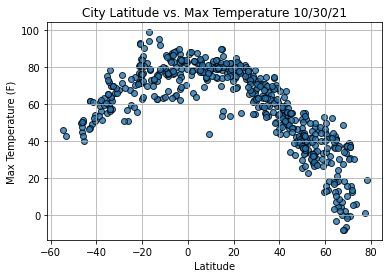

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

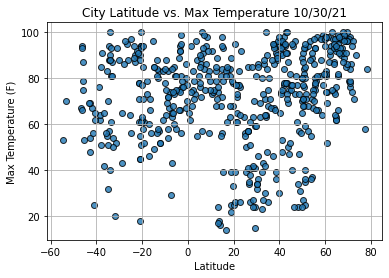

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

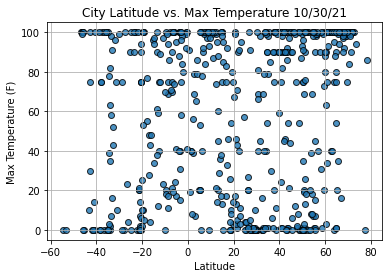

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

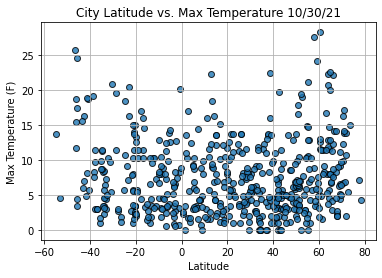

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

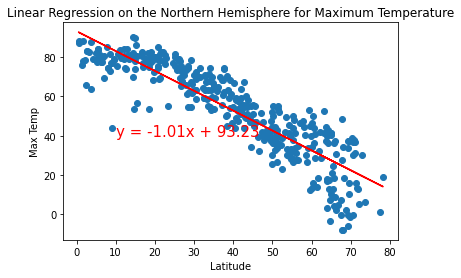

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

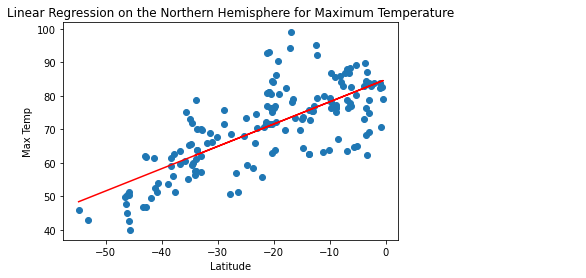

In [23]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

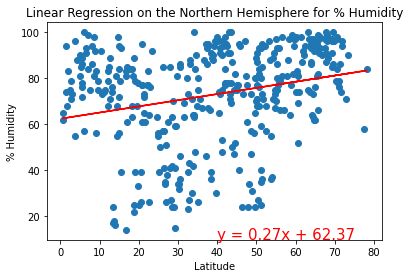

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

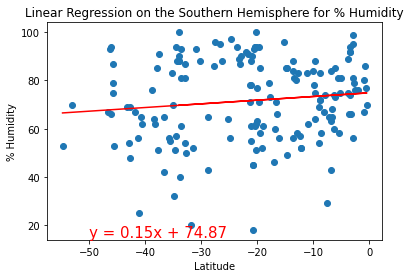

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

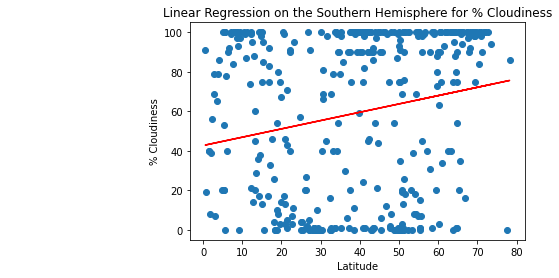

In [26]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

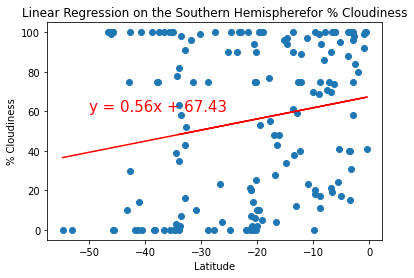

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemispherefor % Cloudiness', '% Cloudiness',(-50,60))

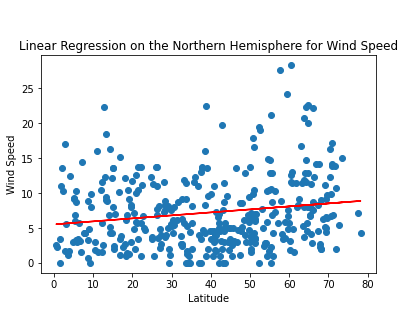

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

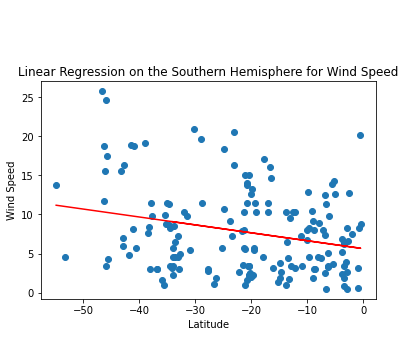

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))